In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def integration_two_point_gauss(function, x1, x2, h):
    n = int((x2-x1)/h)
    x_values = [x1+h*i for i in range(n)]    
    integral = 0
    
    for x in x_values:
        x1 = x
        x2 = x1 + h

        a = (x1+x2)/2.0 - (x2-x1)/(2.0*math.sqrt(3.0))
        b = (x1+x2)/2.0 + (x2-x1)/(2.0*math.sqrt(3.0))

        f_a = function(a)
        f_b = function(b)

        integral_gauss = h*(f_a+f_b)/2.0
        integral = integral + integral_gauss

    return integral

In [3]:
A3 = 143.910092 #mass of parent nucleus
Z = 60         #atomic number of parent nucleus
A1 = 139.905448 #mass of daughter nucleus
A2 = 4.002603
hc = 197
fs = 1/137
R = 1.2*((A1**(1/3))+(A2**(1/3)))
malpha = A2*A1*931.49/A3
Q = (A3-A1-A2)*931.49
pi = math.pi
c = 3*(10**23)
b = 2*(Z-2)*hc*fs/Q
v = c*math.sqrt(2*Q/malpha)
vc = v/(2*R)
h = 0.0001

Square Well

In [4]:

G = math.sqrt(2*malpha*Q)*b*(pi/2 - 2*math.sqrt(R/b))/hc
T = math.exp(-2*G)
lam = vc*T
T_half = math.log(2)/lam
print(T_half)

5.542827137248644e+22


In [5]:
V0 = 50
a = 0.5
E = Q
def Vws(r):
    return -V0/(1+math.exp((r-R)/a))
def Vc(r):
    if r<=R:
        return 2*(Z-2)*hc*fs*(3-((r/R)**2))/(2*R)
    if r>R:
        return 2*(Z-2)*hc*fs/r
def k(r):
    V = Vc(r)+Vws(r)
    return math.sqrt(2*malpha*abs(V-E))/hc
G = integration_two_point_gauss(k, R, b, h)
T = np.exp(-2*G)
lam = vc*T
T_half = math.log(2)/lam
print(T_half)

1.7798055958427078e+22


Wood-Saxon Potential

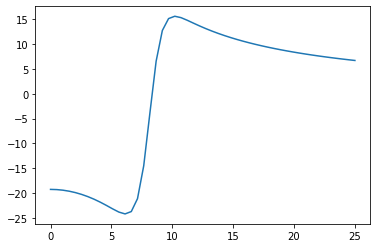

In [6]:
r=np.linspace(0,25)
lol=[]
for ra in r:
    lol.append(Vc(ra)+Vws(ra))
plt.plot(r,lol)

In [7]:
V0 = 50
a = 0.5
E = Q
def Vws(r):
    return -V0/(1+math.exp((r-R)/a))
def Vc(r):
    if r<=R:
        return 2*(Z-2)*hc*fs*(3-((r/R)**2))/(2*R)+Vws(r)
    if r>R:
        return 2*(Z-2)*hc*fs/r
def k(r):
    V = Vc(r)
    return math.sqrt(2*malpha*abs(V-E))/hc
G = integration_two_point_gauss(k, R, b, h)
T = np.exp(-2*G)
lam = vc*T
T_half = math.log(2)/lam
print(T_half)
print(lam,G,vc)

1.5040683311346897e+23
4.608481983242248e-24 50.78647942849438 5.972187527060387e+20


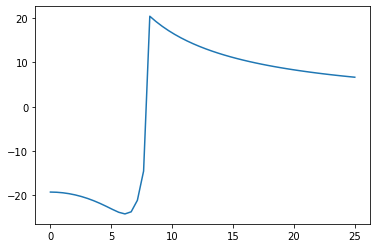

In [8]:
# The function written in the notes.pdf is incorrect
r=np.linspace(0,25)
lol=[]
for ra in r:
    lol.append(Vc(ra))
plt.plot(r,lol)